CSV data from https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
# this line is not really needed, just make plots looks nicer
plt.style.use('bmh')

In [2]:
# replace the path to your own downloaded csv file path if you are a beginner
df = pd.read_csv("./BankChurners.csv")
print("The shape of current dataset:")
print(df.shape)
df.sample(5)

The shape of current dataset:
(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
9674,751166508,Existing Customer,57,M,3,Post-Graduate,Single,$80K - $120K,Blue,50,...,34516.0,2293,32223.0,0.799,14287,114,0.754,0.066,0.000041,0.99996
615,789317883,Existing Customer,54,M,2,College,Married,$80K - $120K,Blue,44,...,18750.0,1705,17045.0,0.807,1200,36,0.895,0.091,0.000294,0.99971
1242,738749733,Existing Customer,57,F,4,Doctorate,Married,Unknown,Blue,47,...,7345.0,1814,5531.0,0.472,1390,30,0.250,0.247,0.000459,0.99954
9686,718316058,Existing Customer,51,M,1,Uneducated,Married,$60K - $80K,Blue,38,...,13731.0,1375,12356.0,0.878,14826,99,0.707,0.100,0.000105,0.99990
6714,715395933,Existing Customer,44,F,3,College,Unknown,Unknown,Blue,35,...,11238.0,2336,8902.0,0.911,5302,70,0.892,0.208,0.000115,0.99989


In [3]:
# those three columns are not useful for analyzing, we need to drop them
to_drop = ["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
for colname in to_drop:
    df.drop(colname, inplace = True, axis = 1)

In [4]:
print("The shape of current dataset:")
print(df.shape)
df.sample(5)

The shape of current dataset:
(10127, 20)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5705,Existing Customer,34,F,0,Unknown,Married,Less than $40K,Blue,26,5,3,1,2291.0,0,2291.0,0.892,5409,82,0.822,0.000
2311,Existing Customer,41,F,2,High School,Married,$40K - $60K,Blue,36,5,2,4,2602.0,1490,1112.0,0.660,3151,78,0.660,0.573
9098,Existing Customer,42,M,3,Unknown,Married,Less than $40K,Silver,31,1,1,1,14630.0,0,14630.0,0.752,8217,99,0.650,0.000
5016,Attrited Customer,57,F,2,Uneducated,Married,Unknown,Blue,51,3,6,2,2404.0,284,2120.0,0.866,2511,51,0.500,0.118
7300,Attrited Customer,53,M,2,Unknown,Married,$80K - $120K,Blue,34,4,3,2,1837.0,875,962.0,0.580,2169,43,0.654,0.476


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
print(df.describe())

       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    

Lets descover the non-numerical values in the given table

In [7]:
first_line = df.iloc[0]
print(first_line)

Attrition_Flag              Existing Customer
Customer_Age                               45
Gender                                      M
Dependent_count                             3
Education_Level                   High School
Marital_Status                        Married
Income_Category                   $60K - $80K
Card_Category                            Blue
Months_on_book                             39
Total_Relationship_Count                    5
Months_Inactive_12_mon                      1
Contacts_Count_12_mon                       3
Credit_Limit                            12691
Total_Revolving_Bal                       777
Avg_Open_To_Buy                         11914
Total_Amt_Chng_Q4_Q1                    1.335
Total_Trans_Amt                          1144
Total_Trans_Ct                             42
Total_Ct_Chng_Q4_Q1                     1.625
Avg_Utilization_Ratio                   0.061
Name: 0, dtype: object


As what we see in the table, the first line of dataframe only contains values like "existing customer", "45", "M", "3".... and the first column we print above contains the name of the column.

So it must be a hash-table type of data (in Python, we call it dictionary) with keys and values.

Therefore, we can use its values to decide if it is a categorical value, or numerical value.

But this is not a safe way, if we print out the one column, like this:

In [8]:
print(df["Attrition_Flag"])
print(type(df["Attrition_Flag"]))

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object
<class 'pandas.core.series.Series'>


You can see a feature names "dtype".
If you are using ide for python debugging instead of jupyter notebook and put a break point on a variable x (x = df\["Attrition_Flag"\]), you can see that dtype is a class method for andas.core.series.Series

In [9]:
# first mentioned method ,not safe but it is a way if you are not familiar with pandas
# categorical_vars = []
# for key, val in first_line.items():
#     try:
#         num = float(val)
#     except:
#         categorical_vars.append(key)
# print(categorical_vars)

In [10]:
# second method
categorical_vars = []
for col_name in df.columns:
    if df[col_name].dtype == "object":
        categorical_vars.append(col_name)
print(categorical_vars)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [11]:
import collections

def plot_cat(df, cat_name):
    """
    This function is to plot single categorical value in a plot
    @type df: pandas dataframe
    @type cat: string, a column with categorical value in df
    """
    f, ax = plt.subplots()
    # val_dict = {cat1: count_cat_2, cat2:count_cat_2}
    val_dict = collections.Counter(df[cat_name].values)
    names = [key for key in val_dict]
    heights = [val for val in val_dict.values()]
    ax.bar(names, heights)
    # if you just want to show the image, you don't have to return f
    # if you want the image item for further usage, like to save if ,you can return f, which is the figure itself
    return f

def plot_all(df, cat_names, l = 3, fsize = (18, 10)):
    """
    Plot all categorical value in one figure
    @type df: pandas dataframe
    @type cat_names: List[String], list contains categorical values
    @type l: int, how many subplots will be in one line of the plot (default 3)
    @type fsize: tuple, length and height of the plot
    """
    h = len(cat_names)//l
    f, ax = plt.subplots(h, l, figsize = fsize)
    for i in range(h):
        for j in range(l):
            idx = i * l + j
            cat_name = cat_names[idx]
            val_dict = collections.Counter(df[cat_name].values)
            names = [key for key in val_dict]
            for name in names:
                # if the value in current plot is too long, rotate the x label in the current subplot
                # for cagetorical variable with less category, we do not have to rotate them. You can modify 50 to other values to see what will happend
                if len(name) * len(names) > 50:
                    ax[i][j].tick_params(axis='x', rotation=30)
                    break
            heights = [val for val in val_dict.values()]      
            # use random rgb value to plot, you can delete color = if you just want the default blue color.
            # seaborn library also available to apply color scheme on plot
            rects = ax[i][j].bar(names, heights, color = (random.random(),random.random(),random.random()))
            ax[i][j].set_title(cat_name)
            # percentage label
            cnt = sum(heights)
            for rect in rects:
                w = rect.get_width()
                x = rect.get_x()
                h = rect.get_height()
                ax[i][j].text(rect.get_x() + rect.get_width()/2, h, str(round(h/cnt * 100, 3)) + "%", ha = "center", va = "bottom")
    return f

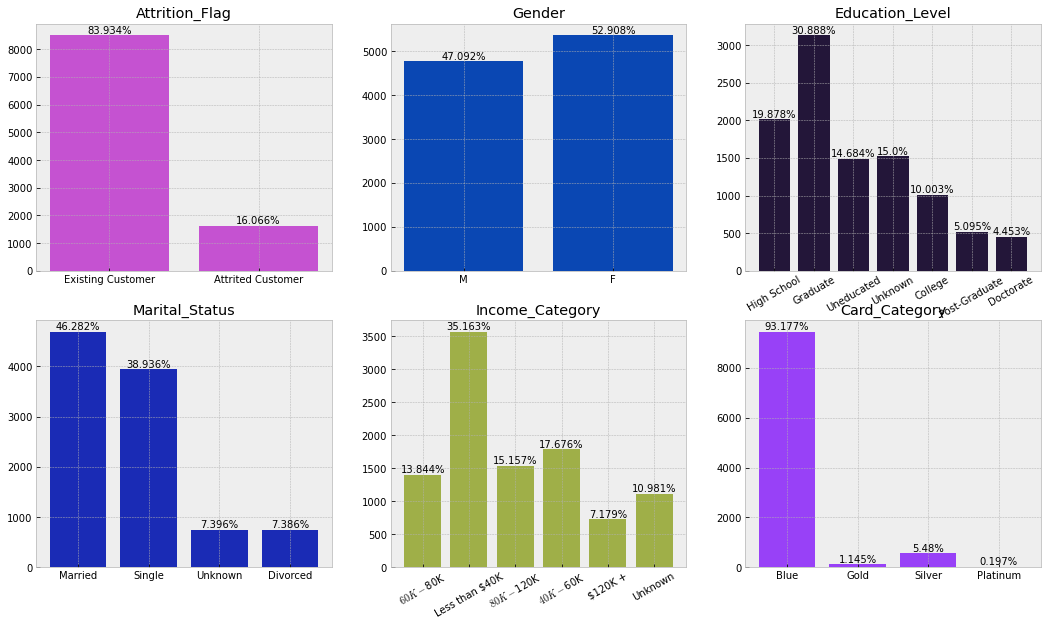

In [12]:
# not really needed, only because these random seed make the generated figure looks nicer
cat_plots = plot_all(df, categorical_vars)

The other columns contains numerical values

In [13]:
num_vals = []
for item in df.columns:
    if item not in categorical_vars:
        num_vals.append(item)
num_vals

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

For plotting numerical data, you have to use seaborn and scipy library for fitting
Matplotlib + scipy is also fine, but it is too time consuming in coding, especially in fitting.

In [28]:
import seaborn as sns
import scipy

In [44]:
def plot_all_num(df, num_names, l = 4,  fsize = (18, 10)):
    h = len(num_names)//l
    f, ax = plt.subplots(h, l, figsize = fsize)
    for i in range(h):
        for j in range(l):
            idx = i * l + j
            num_name = num_names[idx]
            sns.displot(df.loc[:, num_name], kde = True, ax = ax[idx])
            ax[i][j].set_title(num_names[idx])
    return f

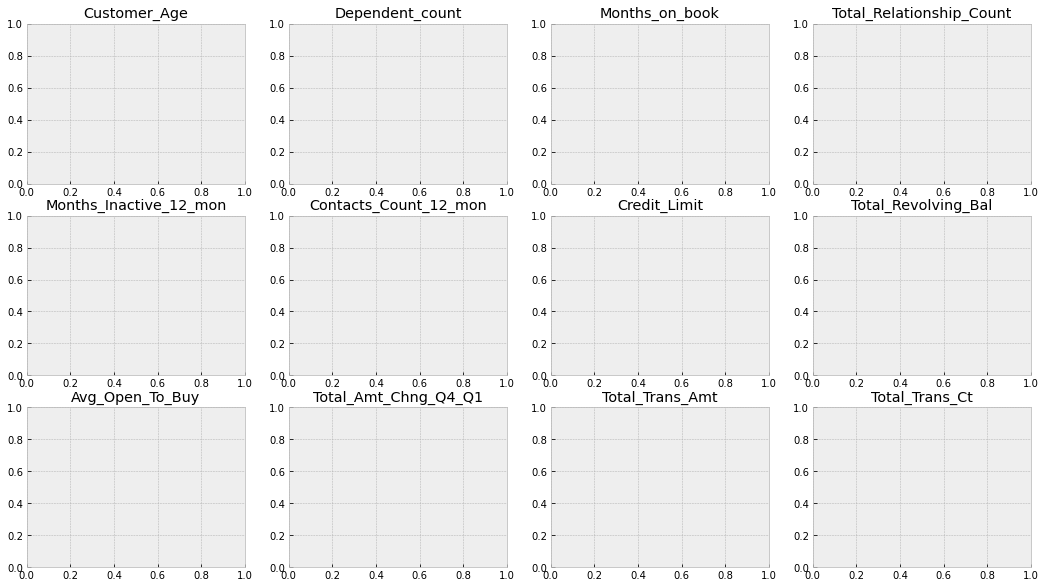

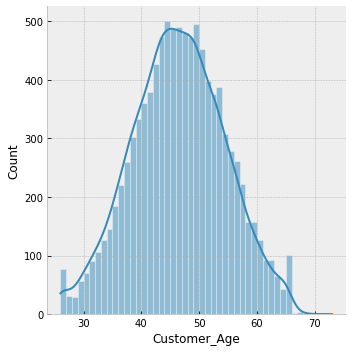

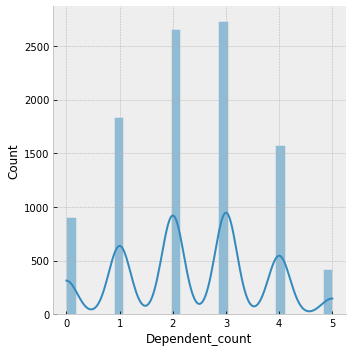

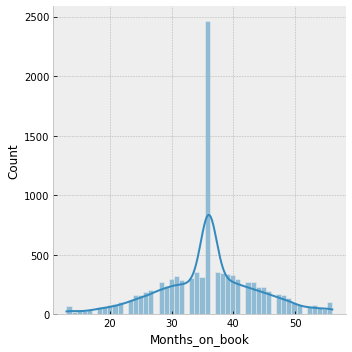

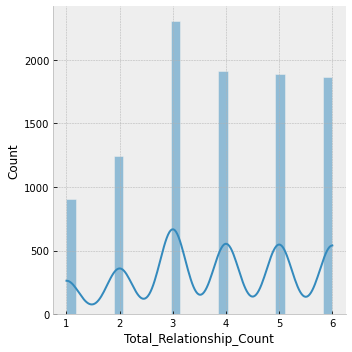

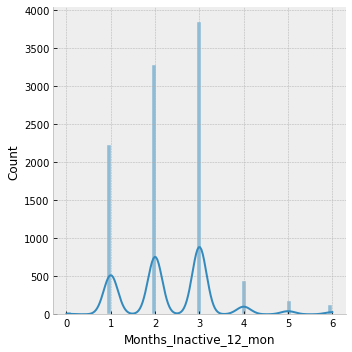

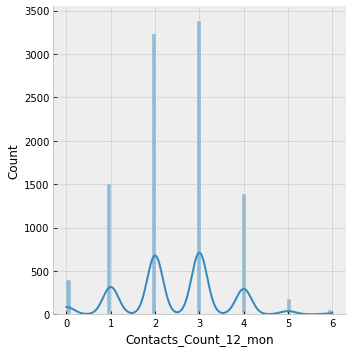

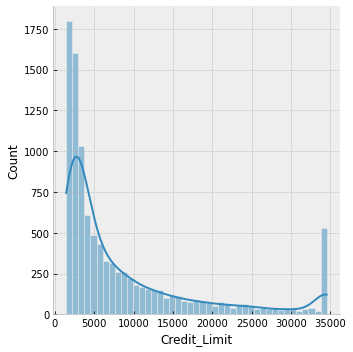

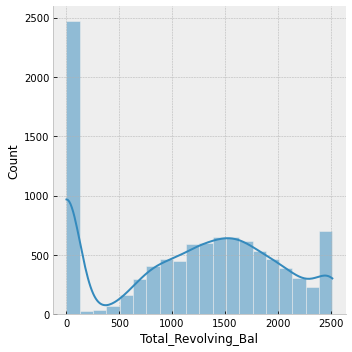

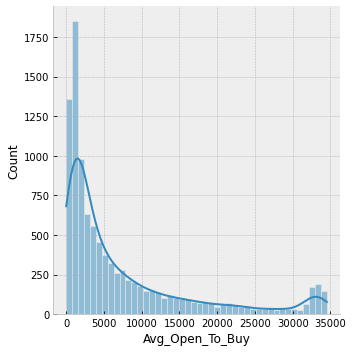

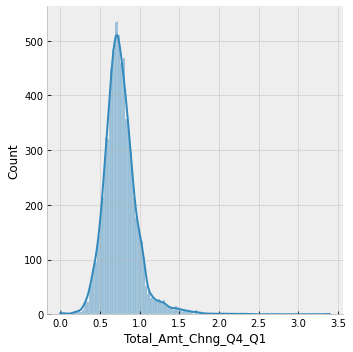

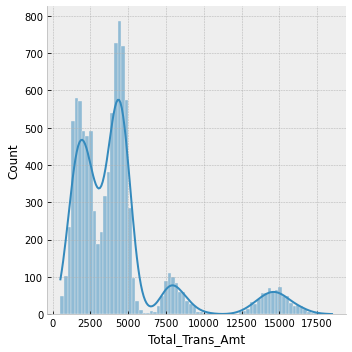

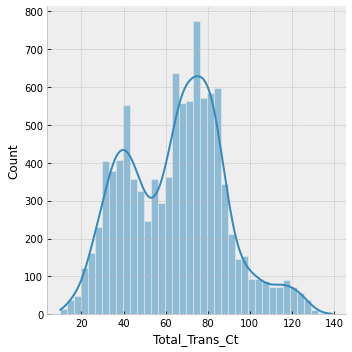

In [43]:
num_plots = plot_all_num(df, num_vals)